In [76]:
 # The class of BH

import numpy as np
import MorseCodePy as morse
from astropy import units as u
from astropy import constants as const


class BH_model:
    def __init__(self, height = 2 * u.meter, p_rad = 10 * u.kilometer, p_time = 1 * u.second, obs_wavelength = 500 * u.nanometer, dot_d = 3 * u.millisecond, dash_d = 5 * u.millisecond, message = 'Hello'):

        self.height         = height
        self.proper_r       =  p_rad
        self.proper_t       = p_time
        self.obs_wavelength = obs_wavelength
        self.dot_d          = dot_d
        self.dash_d         = dash_d
        self.message        = message

        self.c  = const.c
        self.G  = const.G
        self.ge = (2 * const.G * const.M_earth * self.height)/ (const.R_earth **3)

        self.mass            = self.mass_of_BH()
        self.schwarazchild_r = self.schwarazchild_radius()
        self.coordinate_r    = self.coordinate_distance()
        self.radial_r        = self.radial_distance()
        self.f_of_r          = self.function_r()
        self.coordinate_t    = self.coordinate_time()
        self.proper_a        = self.proper_accelaration()
        self.B_distance      = self.distance_of_B()
        self.AB_distance     = self.distance_AB()
        self.z               = self.redshift_factor()
        self.A_emittedW      = self.emitted_wavelength_A()
        self.B_emittedW      = self.emitted_wavelength_B()
        self.signal_travel_t = self.signal_travel_time()
        self.dot_A           = self.dot_duration_A()
        self.dash_A          = self.dash_duration_A()
        self.dot_B           = self.dot_duration_B()
        self.dash_B          = self.dash_duration_B()
        self.msg_t_A         = self.message_time_A()
        self.msg_t_B         = self.message_time_B()

    def mass_of_BH(self):
        return (pow(self.c, 3)/ (2*self.G)) * np.sqrt(self.height/self.ge)

    def schwarazchild_radius(self):
        return (2 * self.G * self.mass) / pow(self.c, 2)

    def coordinate_distance(self):
        return (- self.schwarazchild_r + np.sqrt(pow(self.schwarazchild_r, 2) + 4 * pow(self.proper_r, 2)))/ 2

    def radial_distance(self):
        return self.coordinate_r + self.schwarazchild_r

    def function_r(self):
        return np.sqrt(1 - (self.schwarazchild_r/self.radial_r))

    def coordinate_time(self):
        return self.proper_t/self.f_of_r

    def proper_accelaration(self):
        return (self.G * self.mass)/ (pow(self.radial_r, 2) * self.f_of_r)

    def distance_of_B(self):
        dis_me = 3.843e8 * u.meter
        return np.sqrt((self.G * self.mass) / ((const.G * (const.M_earth * 0.0123))/ pow(dis_me, 2)))

    def distance_AB(self):
        return self.B_distance - self.radial_r

    def redshift_factor(self):
        return -1 + (1/self.f_of_r)

    def emitted_wavelength_A(self):
        return self.obs_wavelength / (1 + self.z)

    def emitted_wavelength_B(self):
        return self.obs_wavelength * (1 + self.z)

    def signal_travel_time(self):
        return (self.AB_distance/self.c) + ((self.schwarazchild_r/self.c)*(self.B_distance - self.schwarazchild_r)/(self.radial_r - self.schwarazchild_r))

    def dot_duration_A(self):
        return self.dot_d * self.f_of_r

    def dash_duration_A(self):
        return self.dash_d * self.f_of_r

    def dot_duration_B(self):
        return self.dot_d / self.f_of_r

    def dash_duration_B(self):
        return self.dash_d / self.f_of_r

    def message_time_A(self):
        msg_M = morse.encode(self.message, language = "English")
        dic = dict(zip( list(set(msg_M)),[msg_M.count(i) for i in set(msg_M)]))
        dot = ['.', ' ']
        dash = ['-', '/']
        t = []
        for i in set(msg_M):
            if i in dot:
                t.append(dic[i]* self.dot_A)
            elif i in dash:
                t.append(dic[i]* self.dash_A)
            else:
                raise RuntimeError("Error in decoding")

        return sum(t)

    def message_time_B(self):
        msg_M = morse.encode(self.message, language = "English")
        dic = dict(zip( list(set(msg_M)),[msg_M.count(i) for i in set(msg_M)]))
        dot = ['.', ' ']
        dash = ['-', '/']
        t = []
        for i in set(msg_M):
            if i in dot:
                t.append(dic[i]* self.dot_B)
            elif i in dash:
                t.append(dic[i]* self.dash_B)
            else:
                raise RuntimeError("Error in decoding")

        return sum(t)

    def so_far(self):
        print(f"Following are the results: \n ")
        print(f" mass                  = {self.mass: .3e} = {self.mass.to(u.solMass): .3e}")
        print(f" Schwarazchild radius  = {self.schwarazchild_r: .3e}")
        print(f" Coordinate Distanc    = {self.coordinate_r: .3e}")
        print(f" Radial Distance       = {self.radial_r: .3e}")
        print(f" f(r)                  = {self.f_of_r: .3e}")
        print(f' Coordinate Time       = {self.coordinate_t: .3e}')
        print(f" Proper acceleration   = {self.proper_a: .3e}")
        print(f" Distance of B         = {self.B_distance: .3e}")
        print(f" Distance AB           = {self.AB_distance: .3e}")
        print(f" Redshift factor(z)    = {self.z: .3e}")
        print(f" Emitted Wavelength(A) = {self.A_emittedW: .3e}")
        print(f" Emitted Wavelength(B) = {self.B_emittedW: .3e}")
        print(f" Signal Travel Time    = {self.signal_travel_t: .3e}")
        print(f" Dot Duration(A)       = {self.dot_A: .3e}")
        print(f" Dot Duration(B)       = {self.dot_B: .3e}")
        print(f" Dash Duration(A)      = {self.dash_A: .3e}")
        print(f" Dash Duration(B)      = {self.dash_B: .3e}")
        print(f" Text Time(A)          = {self.msg_t_A: .3e}")
        print(f" Text Time(B)          = {self.msg_t_B: .3e}")

m1 = BH_model()
m1.so_far()


Following are the results: 
 
 mass                  =  1.152e+38 kg =  5.791e+07 solMass
 Schwarazchild radius  =  1.710e+11 m
 Coordinate Distanc    =  5.798e-04 m
 Radial Distance       =  1.710e+11 m
 f(r)                  =  5.867e-08
 Coordinate Time       =  1.705e+07 s
 Proper acceleration   =  4.479e+12 m / s2
 Distance of B         =  1.522e+16 m
 Distance AB           =  1.522e+16 m
 Redshift factor(z)    =  1.705e+07
 Emitted Wavelength(A) =  2.933e-05 nm
 Emitted Wavelength(B) =  8.523e+09 nm
 Signal Travel Time    =  1.497e+22 s
 Dot Duration(A)       =  1.760e-07 ms
 Dot Duration(B)       =  5.114e+07 ms
 Dash Duration(A)      =  2.933e-07 ms
 Dash Duration(B)      =  8.523e+07 ms
 Text Time(A)          =  4.107e-06 ms
 Text Time(B)          =  1.193e+09 ms


In [74]:
dis_me = 3.843e8 * u.meter

(((const.G * (const.M_earth * 0.0123))/ pow(dis_me, 2))).decompose()

<Quantity 3.31972472e-05 m / s2>

In [14]:
h = 1 * u.m
(pow(const.c, 3)/2*const.G) * np.sqrt(pow(h, 2)*pow((h +const.R_earth), 3)/2 *const.G *const.M_earth)

<Quantity 2.04469621e+32 m10 / (kg s6)>

In [73]:
c = const.c
G = const.G
h = 1* u.m
re = const.R_earth
Me = const.M_earth

a = pow(c, 3)
b = 2 * G
C = a/b
d = pow((re), 3)
e = 2 * G * Me *1* u.m
f = e/d
g = h/f
mass = (np.sqrt(g)*C).to(u.solMass)

pr = 10000*u.m

rs = ((2 * G * mass) / pow(c, 2)).decompose()
dr = (-rs + np.sqrt(pow(rs, 2) + 4*(pow(pr, 2))))/2

mass

<Quantity 57912671.90423604 solMass>

In [91]:
msg = 'hello world'

dot_B = m1.dot_B
dash_B = m1.dash_B

def message_time_B(message):
        msg_M = morse.encode(message, language = "English")
        dic = dict(zip( list(set(msg_M)),[msg_M.count(i) for i in set(msg_M)]))
        print(dic)
        dot = ['.', ' ']
        dash = ['-', '/']
        t = []
        for i in set(msg_M):
            if i in dot:
                t.append(dic[i]* dot_B)
            elif i in dash:
                t.append(dic[i]* dash_B)
            else:
                raise RuntimeError("Error in decoding")
        
        return sum(t)
message_time_B(msg).to(u.s)

{'.': 19, ' ': 10, '-': 13, '/': 1}


<Quantity 2676169.95476329 s>

In [10]:
T =  2 * np.pi * np.sqrt (m1.radial_r**3/ (m1.G * m1.mass))
C = 2 * np.pi * m1.radial_r

C2 = 2 * np.pi * m1.B_distance
C2/T

<Quantity 8.27245388e+12 m / s>

In [11]:
np.sqrt(m1.proper_a * m1.radial_r)

<Quantity 1.35446533e+08 m / s>

In [13]:
# np.sqrt(m1.)

a = ((const.G * (const.M_earth * 0.0123))/ pow(3.843e8 * u.meter, 2))
np.sqrt(a * m1.B_distance)

<Quantity 470760.9594336 m / s>

In [21]:
T2 = 2 * np.pi * np.sqrt (m1.B_distance**3/ (m1.G * m1.mass))
T2.to(u.year)

<Quantity 2823.4120758 yr>

In [25]:
T.to(u.hour)/m1.f_of_r

<Quantity 1.72499344 h>

In [24]:
m1.coordinate_time()

<Quantity 1.22474487 s>

$$ \frac{\sqrt[3]{r_o}}{c\sqrt{r_s}} (\frac{\pi}{2} - \frac{2}{3}\sqrt[3]{\frac{r_s}{r_o}})$$ 

In [ ]:
r0 = m1.radial_r

rs = m1.schwarazchild_r + 1 * u.kilometer
r0 = 2 * u.kilometer  + rs

t = (r0**(3/2))/(m1.c * np.sqrt(rs)) * ((np.pi/2)- (2/3)*((rs/r0)**(3/2)))
t.to(u.minute)

<Quantity 1.65480612 min>

In [19]:
(1 * u.kilometer / t.to(u.second) ).to(u.meter/u.second)

<Quantity 10.07167331 m / s>

In [26]:
np.sqrt(m1.proper_a/1000*u.m)

<Quantity 214011.20570212 m / s>

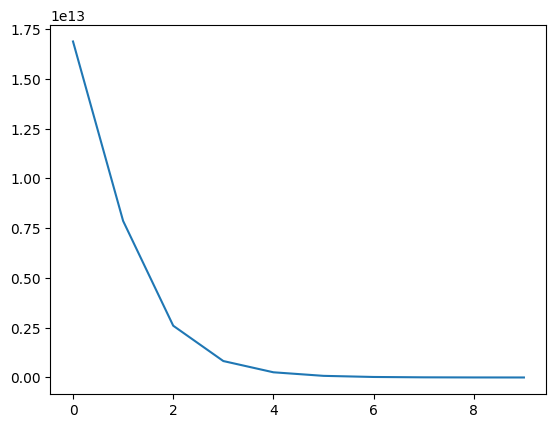

In [22]:
def function(mass):
    
    rs = (2 * const.G * mass )/ const.c**2
    r = rs + 1000 * u.meter
    q = np.sqrt( 1 - (rs/r))
    a = (const.G * mass / r**2) * (1/q)
    return a
x = []
for i in range(10):
    x.append(function((10**(i))* u.solMass).to(const.g0.unit).value)
    
import matplotlib.pyplot as plt

plt.plot(x)



In [26]:
function((6.6e10)* u.solMass).to(const.g0.unit)

<Quantity 1.01786329e+08 m / s2>

In [1]:
import astropy.constants as const

In [5]:
const.g0

<<class 'astropy.constants.codata2018.CODATA2018'> name='Standard acceleration of gravity' value=9.80665 uncertainty=0.0 unit='m / s2' reference='CODATA 2018'>

In [2]:
import numpy as np
import MorseCodePy as morse
from astropy import units as u
from astropy import constants as const


G = const.G
c = const.c
dg = 3.0723e-6 * u.m/(u.second**2)

def mass_from_h(height):
    return ((pow(c, 3)/ (2*G)) * np.sqrt(height/dg)).to(u.solMass)


min_h  = 163 
max_h = 183 
for h in range(min_h, max_h, 1):
    # print(h*u.centimeter)
    a = mass_from_h((h*u.centimeter).to(u.m))
min_h

163

In [6]:
np.log10(a.value) * u.dex(u.solMass)

<Dex 7.89282436 dex(solMass)>